In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

etsy = pd.read_csv('CA_listings_22520_notfull.csv')

In [79]:
etsy.head()

,Unnamed: 0,index,City,Description,Price,Region,State
0,0,0,Oakland,Mickey Mouse Disney 1990's Vintage Tshirt,25.00,NaN,California
1,1,1,Oakland,Vintage Esprit Pastel Long Sleeve Button Up Pa...,78.95,NaN,California
2,2,2,Oakland,Vintage 1990s Olive Green Velveteen Quilted Bo...,22.50,NaN,California
3,3,3,Oakland,1910s Art Nouveau Dress | Vintage Teens Edward...,185.00,NaN,California
4,4,4,Oakland,Vintage 1950s Ivory Lace Embroidered Floral Bl...,20.00,NaN,California


In [80]:
columns = ['total_index','city_index','City','Description','Price','Region','State']

etsy.columns = columns

In [81]:
etsy.head()

,total_index,city_index,City,Description,Price,Region,State
0,0,0,Oakland,Mickey Mouse Disney 1990's Vintage Tshirt,25.00,NaN,California
1,1,1,Oakland,Vintage Esprit Pastel Long Sleeve Button Up Pa...,78.95,NaN,California
2,2,2,Oakland,Vintage 1990s Olive Green Velveteen Quilted Bo...,22.50,NaN,California
3,3,3,Oakland,1910s Art Nouveau Dress | Vintage Teens Edward...,185.00,NaN,California
4,4,4,Oakland,Vintage 1950s Ivory Lace Embroidered Floral Bl...,20.00,NaN,California


In [82]:
import nltk
#nltk.download()

In [83]:
from nltk.tokenize import word_tokenize


In [84]:
tokenized = (word_tokenize(etsy.Description[3]))

tokenized

['1910s',
 'Art',
 'Nouveau',
 'Dress',
 '|',
 'Vintage',
 'Teens',
 'Edwardian',
 'Dusty',
 'Rose',
 'Silk',
 'Chiffon',
 'Garden',
 'Party',
 'Tea',
 'Dress',
 'w/',
 'Golden',
 'Sari',
 'Mesh',
 'Lace',
 '|',
 'Extra',
 'Small',
 'XS']

In [85]:
#importing stop words
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [86]:
#maybe tokenizing this way is better so we can get rid of all punctuation even if it isn't space separated
#from nltk.tokenize import WordPunctTokenizer
#result = etsytoken['Description'].apply(lambda x: WordPunctTokenizer().tokenize(x))

In [87]:
#making lower case and tokenizing

etsytoken = etsy.copy()

#lowercase
etsytoken['lower'] = etsytoken['Description'].apply(lambda x: x.lower())
#tokenize with punctuation
etsytoken['tokenized'] = etsytoken['lower'].apply(lambda x: WordPunctTokenizer().tokenize(x))



In [88]:
etsytoken


,total_index,city_index,City,Description,Price,Region,State,lower,tokenized
0,0,0,Oakland,Mickey Mouse Disney 1990's Vintage Tshirt,25.00,NaN,California,mickey mouse disney 1990's vintage tshirt,"[mickey, mouse, disney, 1990, ', s, vintage, t..."
1,1,1,Oakland,Vintage Esprit Pastel Long Sleeve Button Up Pa...,78.95,NaN,California,vintage esprit pastel long sleeve button up pa...,"[vintage, esprit, pastel, long, sleeve, button..."
2,2,2,Oakland,Vintage 1990s Olive Green Velveteen Quilted Bo...,22.50,NaN,California,vintage 1990s olive green velveteen quilted bo...,"[vintage, 1990s, olive, green, velveteen, quil..."
3,3,3,Oakland,1910s Art Nouveau Dress | Vintage Teens Edward...,185.00,NaN,California,1910s art nouveau dress | vintage teens edward...,"[1910s, art, nouveau, dress, |, vintage, teens..."
4,4,4,Oakland,Vintage 1950s Ivory Lace Embroidered Floral Bl...,20.00,NaN,California,vintage 1950s ivory lace embroidered floral bl...,"[vintage, 1950s, ivory, lace, embroidered, flo..."
5,5,5,Oakland,vintage | grandma | sweater | 70s | mustard ye...,40.00,NaN,California,vintage | grandma | sweater | 70s | mustard ye...,"[vintage, |, grandma, |, sweater, |, 70s, |, m..."
6,6,6,Oakland,Vintage '60s Vibrant ROSA RAY Chicago Mid Cent...,46.00,NaN,California,vintage '60s vibrant rosa ray chicago mid cent...,"[vintage, ', 60s, vibrant, rosa, ray, chicago,..."
7,7,7,Oakland,Vintage tunic womens dress,15.00,NaN,California,vintage tunic womens dress,"[vintage, tunic, womens, dress]"
8,8,8,Oakland,Candi Jones California Womens Boho Coachell...,100.00,NaN,California,candi jones california womens boho coachell...,"[candi, jones, california, womens, boho, coach..."
9,9,9,Oakland,vintage 1990s floral skirt / pastel button-up ...,34.00,NaN,California,vintage 1990s floral skirt / pastel button-up ...,"[vintage, 1990s, floral, skirt, /, pastel, but..."


In [89]:
#add more stopwords and make stopword removal function

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('vintage')
stopwords.append(',')
stopwords.append('/')
stopwords.append('|')
stopwords.append("'")
stopwords.append("s")
stopwords.append("//")
stopwords.append("-")
stopwords.append(";")
stopwords.append("'s")
stopwords.append('"')
stopwords.append(",")
stopwords.append(".")
stopwords.append("#")
stopwords.append("*")
stopwords.append("%")
def nostops(column):
    return([word for word in column if word not in stopwords])


In [90]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
#remove stopwords
etsytoken['tokenized_nostops'] = etsytoken['tokenized'].apply(lambda x: nostops(x))

In [92]:
etsytoken.tokenized_nostops

0                    [mickey, mouse, disney, 1990, tshirt]
1        [esprit, pastel, long, sleeve, button, pastel,...
2        [1990s, olive, green, velveteen, quilted, bomb...
3        [1910s, art, nouveau, dress, teens, edwardian,...
4        [1950s, ivory, lace, embroidered, floral, blou...
5                 [grandma, sweater, 70s, mustard, yellow]
6        [60s, vibrant, rosa, ray, chicago, mid, centur...
7                                   [tunic, womens, dress]
8        [candi, jones, california, womens, boho, coach...
9        [1990s, floral, skirt, pastel, button, maxi, s...
10                                             [70, dress]
11       [1990, woman, 100, leather, forest, moss, gree...
12         [90s, swatch, sweatshirt, pockets, rhinestones]
13       [deadstock, wrangler, staright, leg, jeans, 28...
14       [1800s, womens, victorian, vest, 1900s, ivory,...
15               [cats, butts, front, back, 1990s, tshirt]
16       [90s, black, celtic, shirt, druid, celtic, kno.

In [93]:
etsytoken['description_length_cleaned'] = etsytoken['tokenized_nostops'].apply(lambda x: len(x))

In [94]:
etsytoken.head()

,total_index,city_index,City,Description,Price,Region,State,lower,tokenized,tokenized_nostops,description_length_cleaned
0,0,0,Oakland,Mickey Mouse Disney 1990's Vintage Tshirt,25.00,NaN,California,mickey mouse disney 1990's vintage tshirt,"[mickey, mouse, disney, 1990, ', s, vintage, t...","[mickey, mouse, disney, 1990, tshirt]",5
1,1,1,Oakland,Vintage Esprit Pastel Long Sleeve Button Up Pa...,78.95,NaN,California,vintage esprit pastel long sleeve button up pa...,"[vintage, esprit, pastel, long, sleeve, button...","[esprit, pastel, long, sleeve, button, pastel,...",11
2,2,2,Oakland,Vintage 1990s Olive Green Velveteen Quilted Bo...,22.50,NaN,California,vintage 1990s olive green velveteen quilted bo...,"[vintage, 1990s, olive, green, velveteen, quil...","[1990s, olive, green, velveteen, quilted, bomb...",16
3,3,3,Oakland,1910s Art Nouveau Dress | Vintage Teens Edward...,185.00,NaN,California,1910s art nouveau dress | vintage teens edward...,"[1910s, art, nouveau, dress, |, vintage, teens...","[1910s, art, nouveau, dress, teens, edwardian,...",22
4,4,4,Oakland,Vintage 1950s Ivory Lace Embroidered Floral Bl...,20.00,NaN,California,vintage 1950s ivory lace embroidered floral bl...,"[vintage, 1950s, ivory, lace, embroidered, flo...","[1950s, ivory, lace, embroidered, floral, blou...",19


In [95]:
etsytoken['Price'] = etsytoken['Price'].str.replace(',', '').astype(float)


In [96]:
groups = etsytoken.groupby(['City']).mean()


In [97]:
groups

,total_index,city_index,Price,description_length_cleaned
City,,,,
Los Angeles,6407.5,711.5,68.481636,13.930478
Oakland,711.5,711.5,84.945021,13.941713
Palm Springs,9877.0,477.0,62.580859,12.387435
Sacramento,4983.5,711.5,69.812535,10.867275
San Diego,7831.5,711.5,67.294860,15.555478
San Francisco,2135.5,711.5,125.388525,12.321629
Santa Barbara,8971.5,427.5,121.251192,10.686916
Santa Cruz,3559.5,711.5,55.813392,13.596910


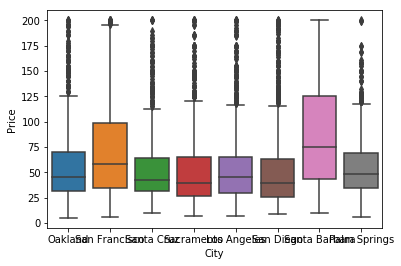

In [111]:
import seaborn as sns

mask = etsytoken.Price <= 200
ax = sns.boxplot(x="City", y="Price", data=etsytoken[mask])

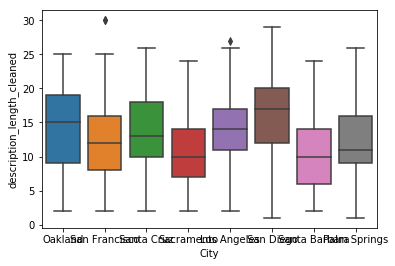

In [99]:
ax = sns.boxplot(x="City", y="description_length_cleaned", data=etsytoken[mask])

In [100]:
import wordfreq 
from wordfreq import word_frequency

In [101]:
word_frequency('velvet', 'en')

5.13e-06

In [102]:
from wordfreq import zipf_frequency
#puts word on a scale from 0-8

In [103]:
zipf_frequency('lace', 'en')

3.67

In [104]:
x = []
for word in etsytoken.tokenized_nostops[7777]:
    x.append(zipf_frequency(word, 'en'))
print(sum(x)/len(x))


4.109090909090909


In [105]:
def avgwordfreq(column):
    x = []
    for word in column:
        x.append(zipf_frequency(word, 'en'))
    return(sum(x)/len(x))


# return([word for word in column if word not in stopwords])

In [106]:
avgwordfreq(etsytoken.tokenized_nostops[7777])

4.109090909090909

In [107]:
etsytoken['avg_word_freq'] = etsytoken['tokenized_nostops'].apply(lambda x: avgwordfreq(x))

In [108]:
etsytoken.head()

,total_index,city_index,City,Description,Price,Region,State,lower,tokenized,tokenized_nostops,description_length_cleaned,avg_word_freq
0,0,0,Oakland,Mickey Mouse Disney 1990's Vintage Tshirt,25.00,NaN,California,mickey mouse disney 1990's vintage tshirt,"[mickey, mouse, disney, 1990, ', s, vintage, t...","[mickey, mouse, disney, 1990, tshirt]",5,4.340000
1,1,1,Oakland,Vintage Esprit Pastel Long Sleeve Button Up Pa...,78.95,NaN,California,vintage esprit pastel long sleeve button up pa...,"[vintage, esprit, pastel, long, sleeve, button...","[esprit, pastel, long, sleeve, button, pastel,...",11,4.316364
2,2,2,Oakland,Vintage 1990s Olive Green Velveteen Quilted Bo...,22.50,NaN,California,vintage 1990s olive green velveteen quilted bo...,"[vintage, 1990s, olive, green, velveteen, quil...","[1990s, olive, green, velveteen, quilted, bomb...",16,4.469375
3,3,3,Oakland,1910s Art Nouveau Dress | Vintage Teens Edward...,185.00,NaN,California,1910s art nouveau dress | vintage teens edward...,"[1910s, art, nouveau, dress, |, vintage, teens...","[1910s, art, nouveau, dress, teens, edwardian,...",22,4.249091
4,4,4,Oakland,Vintage 1950s Ivory Lace Embroidered Floral Bl...,20.00,NaN,California,vintage 1950s ivory lace embroidered floral bl...,"[vintage, 1950s, ivory, lace, embroidered, flo...","[1950s, ivory, lace, embroidered, floral, blou...",19,4.277368


In [109]:
groups = etsytoken.groupby(['City']).mean()
groups

,total_index,city_index,Price,description_length_cleaned,avg_word_freq
City,,,,,
Los Angeles,6407.5,711.5,68.481636,13.930478,4.207902
Oakland,711.5,711.5,84.945021,13.941713,4.165164
Palm Springs,9877.0,477.0,62.580859,12.387435,4.372070
Sacramento,4983.5,711.5,69.812535,10.867275,4.217503
San Diego,7831.5,711.5,67.294860,15.555478,4.129798
San Francisco,2135.5,711.5,125.388525,12.321629,4.108328
Santa Barbara,8971.5,427.5,121.251192,10.686916,4.314259
Santa Cruz,3559.5,711.5,55.813392,13.596910,4.100547


In [127]:
#POS tagging
#https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b
nltk.pos_tag(etsytoken.tokenized_nostops[938])

[('80s', 'CD'),
 ('sugar', 'NN'),
 ('ray', 'NN'),
 ('leonard', 'NN'),
 ('boxing', 'VBG'),
 ('shirt', 'JJ'),
 ('athletic', 'JJ'),
 ('sportswear', 'NN'),
 ('fighting', 'VBG'),
 ('match', 'NN'),
 ('tee', 'NN'),
 ('caesars', 'NNS'),
 ('palace', 'VBP'),
 ('las', 'JJ'),
 ('vegas', 'NN'),
 ('heavyweight', 'JJ'),
 ('cotton', 'NN'),
 ('poly', 'NN'),
 ('xl', 'NN')]

In [ ]:
#can use POS tagging to get decades out ! (anything with CD pos)
#could we use NNS to get clothing types? no probably not

In [ ]:
#https://www.enchantedlearning.com/wordlist/clothes.shtml
#need to attempt to clasify clothing articles
['pullover',
 'jacket',
 'sweatshirt',
 'shirt',
 'coat',
 'sweater',
 'skirt',
 'dress',
 'shorts',
 'pants',
 'jeans',
 'overalls',
 'coveralls',
 'shawl',
 'scarf',
 'muumuu',
 'chemise',
 'tshirt',
 'tee',
 'sock',
 'socks',
 'glove',
 'sweatpants',
 'sweatsuit',
 'sweatshorts',
 'swimsuit',
 'slip',
 'shawl',
 'tank',
 'top',
 'tanktop',
 'trousers',
 'tights',
 'vest',
 'gown',
 'wrap',
 'bottoms',
 'bellbottoms',
 'blouse',
 'blazer',
 'bandana',
 'bloomers']